In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dxy = pd.read_csv ('../../dataset/Indicators/dxy.csv', encoding='unicode_escape')

In [3]:
dxy.head()

,time,close
0,1967-01-31T01:00:00+01:00,119.89
1,1967-02-28T01:00:00+01:00,119.81
2,1967-03-31T01:00:00+01:00,119.79
3,1967-04-28T01:00:00+01:00,119.72
4,1967-05-31T00:00:00+01:00,119.64


In [4]:
#Cleaning and reindexing
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '1976-06-01') & (df.index <= '2022-11-02')]
    return df

In [5]:
dxy = cleaned_indicator(dxy)

In [9]:
#DXY visualization
def dxy_visualization():
    plt.plot(dxy, color= 'b', alpha= 0.7)
    plt.title('Dollar Index Strength (DXY)', fontsize= 20)
    plt.xlabel('Years', fontsize= 20)
    plt.ylabel('Price', fontsize= 20)
    plt.style.use('seaborn')
    return plt.show()

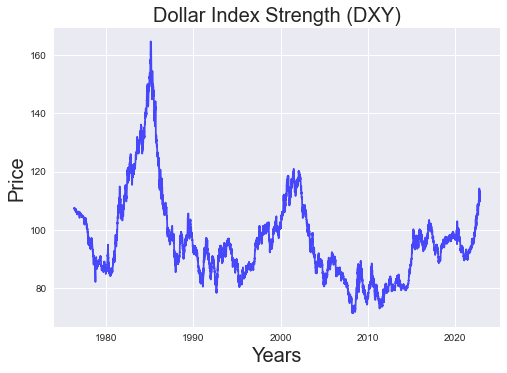

In [10]:
dxy_visualization()